In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

# Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
file_dir = "/content/drive/MyDrive/DS Portfolio/Credit Scoring"
os.chdir(file_dir)

In [4]:
!ls

application_record.csv	credit_record.csv


In [5]:
app_record = pd.read_csv("application_record.csv")
cr_record = pd.read_csv("credit_record.csv")

In [6]:
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [7]:
cr_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


Status :
---
0: 1-29 days past due
---
1: 30-59 days past due
---
2: 60-89 days overdue
---
3: 90-119 days overdue
---
4: 120-149 days overdue
---
5: Overdue or bad debts, write-offs for more than 150 days
---
C: paid off that month
---
X: No loan for the month

# Data Information

In [8]:
app_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [9]:
cr_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


# Statistics Description

In [10]:
app_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [11]:
app_record.select_dtypes('object').describe()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


In [12]:
cr_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [13]:
cr_record.select_dtypes('object').describe()

,STATUS
count,1048575
unique,8
top,C
freq,442031


# Check null, missing value and duplicates

In [14]:
app_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [17]:
round(app_record.isnull().sum()*100/len(app_record), 2)

ID                      0.0
CODE_GENDER             0.0
FLAG_OWN_CAR            0.0
FLAG_OWN_REALTY         0.0
CNT_CHILDREN            0.0
AMT_INCOME_TOTAL        0.0
NAME_INCOME_TYPE        0.0
NAME_EDUCATION_TYPE     0.0
NAME_FAMILY_STATUS      0.0
NAME_HOUSING_TYPE       0.0
DAYS_BIRTH              0.0
DAYS_EMPLOYED           0.0
FLAG_MOBIL              0.0
FLAG_WORK_PHONE         0.0
FLAG_PHONE              0.0
FLAG_EMAIL              0.0
OCCUPATION_TYPE        30.6
CNT_FAM_MEMBERS         0.0
dtype: float64

30,6% value from occupation type is null, we can drop this column

In [18]:
app_record.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [19]:
app_record['ID'].nunique()

438510

the total rows are 438.557, this mean it has duplicate.

In [20]:
app = app_record.drop_duplicates('ID', keep='last')
# we identified that there are some duplicates in this dataset
# we will be deleting those duplicates and will keep the last entry of the ID if its repeated.

In [21]:
cr_record['ID'].nunique()

45985

there are repeating emtries for different monthly values and status.

In [22]:
len(set(cr_record['ID']).intersection(set(app_record['ID'])))

36457

checking to see how many records match in two datasets

# Categorical Columns

In [23]:
cat_app = pd.DataFrame(app.dtypes =='object').reset_index()
object_type = cat_app[cat_app[0] == True]['index']
object_type
#we are filtering the columns that have non numeric values to see if they are useful

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [24]:
a = app[object_type]['CODE_GENDER'].value_counts()
b = app[object_type]['FLAG_OWN_CAR'].value_counts()
c = app[object_type]['FLAG_OWN_REALTY'].value_counts()
d = app[object_type]['NAME_INCOME_TYPE'].value_counts()
e = app[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = app[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = app[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e, '\n', f, '\n', g)

#this is just to see what each column is.
#It seems that all of them are important since there is very fine classifcation in each column.
# their effectiveness cannot be judged at this moment so we convert all of them to numeric values.

F    294412
M    144098
Name: CODE_GENDER, dtype: int64 
 N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64 
 Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64 
 Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64 
 Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64 
 Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64 
 House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAM

# Convert Categorical Value to Numerical Value

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])
# we have transformed all the non numeric data columns into data columns
# this method applies 0,1.. classification to different value types.

<ipython-input-25-87a6518ad144>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app[x] = le.fit_transform(app[x])
<ipython-input-25-87a6518ad144>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app[x] = le.fit_transform(app[x])
<ipython-input-25-87a6518ad144>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [26]:
app.head(12)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0


# Numerical Columns

In [27]:
num_app = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_app = num_app[num_app['yes/no'] ==True]['index']

num_app
#HAVE CREATED SEPARATE LIST FOR NUMERIC TYPE INCASE IT WILL BE NEEDED IN FURTHER ANALYSIS
# IT IS NEEDED IN FURTHER ANALYSIS

0                      ID
1             CODE_GENDER
2            FLAG_OWN_CAR
3         FLAG_OWN_REALTY
4            CNT_CHILDREN
5        AMT_INCOME_TOTAL
6        NAME_INCOME_TYPE
7     NAME_EDUCATION_TYPE
8      NAME_FAMILY_STATUS
9       NAME_HOUSING_TYPE
10             DAYS_BIRTH
11          DAYS_EMPLOYED
12             FLAG_MOBIL
13        FLAG_WORK_PHONE
14             FLAG_PHONE
15             FLAG_EMAIL
16        CNT_FAM_MEMBERS
Name: index, dtype: object

In [28]:
app[num_app].head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0


# Check Outliers

<Axes: xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

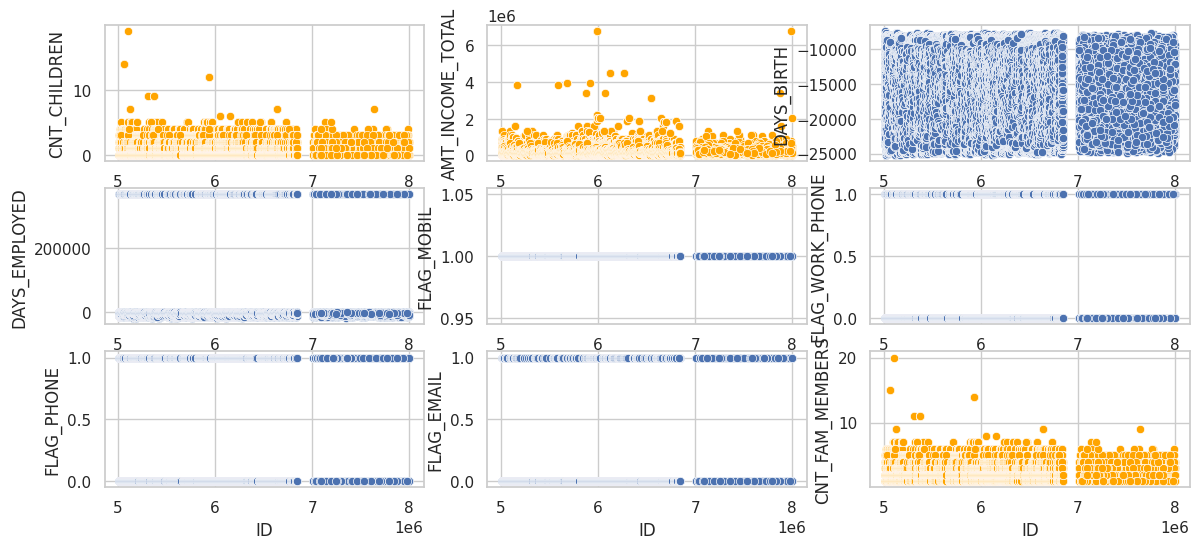

In [29]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

there are outliers in 3 columns


1.   CNT_CHILDREN
2.   AMN_INCOME_TOTAL
3.   CNT_FAM_MEMBERS




# Remove Outliers

In [30]:
# FOR CNT_CHILDREN COLUMN
q_hi = app['CNT_CHILDREN'].quantile(0.999)
q_low = app['CNT_CHILDREN'].quantile(0.001)
app = app[(app['CNT_CHILDREN']>q_low) & (app['CNT_CHILDREN']<q_hi)]

In [31]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = app['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app['AMT_INCOME_TOTAL'].quantile(0.001)
app= app[(app['AMT_INCOME_TOTAL']>q_low) & (app['AMT_INCOME_TOTAL']<q_hi)]

In [32]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = app['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app['CNT_FAM_MEMBERS'].quantile(0.001)
app= app[(app['CNT_FAM_MEMBERS']>q_low) & (app['CNT_FAM_MEMBERS']<q_hi)]

<Axes: xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

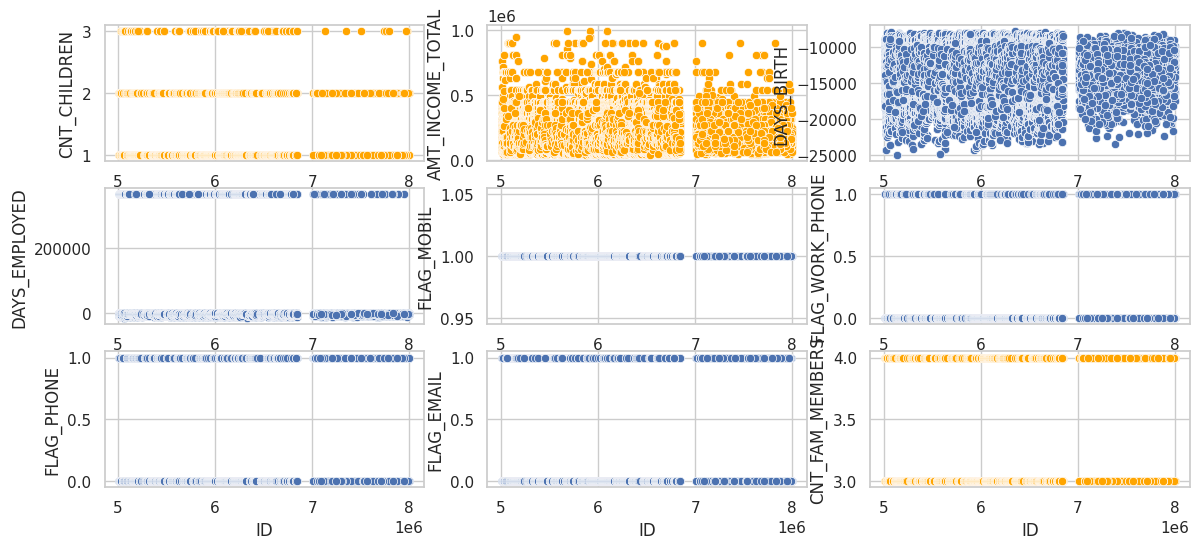

In [33]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

# Status

In [34]:
cr_record['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [35]:
cr_record['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
cr_record['STATUS'] = cr_record['STATUS'].astype('int')
cr_record['STATUS'] = cr_record['STATUS'].apply(lambda x:1 if x >= 2 else 0)

# replace the value C and X with 0 as it is the same type
# 1,2,3,4,5 are classified as 1 because they are the same type
# these will be our labels/prediction results for our model

In [36]:
cr_record['STATUS'].value_counts(normalize=True)

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

In [37]:
# Show the status value in percent to see the distribution
cr_record['STATUS'].value_counts(normalize=True)

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

The data is oversampled for the labels, this is a problem

In [38]:
cr_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [39]:
cr_recordgb = cr_record.groupby('ID').agg(max).reset_index()

cr_recordgb

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001712,0,0
2,5001713,0,0
3,5001714,0,0
4,5001715,0,0
...,...,...,...
45980,5150482,-11,0
45981,5150483,0,0
45982,5150484,0,0
45983,5150485,0,0


# Join The Tabel

In [40]:
df = app.join(cr_recordgb.set_index('ID'), on='ID', how='inner')
df.drop(['MONTHS_BALANCE'], axis=1, inplace=True)

df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 29 to 434805
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   int64  
 2   FLAG_OWN_CAR         9516 non-null   int64  
 3   FLAG_OWN_REALTY      9516 non-null   int64  
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   int64  
 7   NAME_EDUCATION_TYPE  9516 non-null   int64  
 8   NAME_FAMILY_STATUS   9516 non-null   int64  
 9   NAME_HOUSING_TYPE    9516 non-null   int64  
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  FLAG_MOBIL           9516 non-null   int64  
 13  FLAG_WORK_PHONE      9516 non-null   int64  
 14  FLAG_PHONE           9516 non-null   int64  
 15  FLAG_EMAIL           9516 non-null 

# Split the data into features and target

In [42]:
X = df.iloc[:,1:-1] # X value contains all the variables except labels
y = df.iloc[:,-1] # these are the labels

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# we create the test train split first

In [91]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

# we use minmaxscaler because we have removed the outliers
# we have now fit and transform the data into a scaler for accurate reading and results.

# Handle oversampling using SMOTE

In [92]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [46]:
y_train.value_counts()

0    7486
1     126
Name: STATUS, dtype: int64

In [47]:
y_balanced.value_counts()

1    7486
0    7486
Name: STATUS, dtype: int64

In [48]:
y_test.value_counts()

0    1879
1      25
Name: STATUS, dtype: int64

In [49]:
y_test_balanced.value_counts()

0    1879
1    1879
Name: STATUS, dtype: int64

# Classification Model

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [51]:
# Evaluation metrics
def classification_eval (actual, prediction, name):
    cm = confusion_matrix(actual, prediction)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    print(tp, tn, fp, fn)
    accuracy = round( (tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round( (tp) / (tp+fp) * 100, 2)
    recall = round( (tp) / (tp+fn) * 100, 2)
    f1_score = round( 2*(precision * recall) / (precision + recall), 2)

    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy:', accuracy, '%')
    print('Precision:', precision, '%')
    print('Recall:', recall, '%')
    print('f1 Score:', f1_score, '%')

## KNN

### Find optimal value for k

In [55]:
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_balanced, y_balanced)
  pred_i = knn.predict(X_test_balanced)
  error_rate.append(np.mean(pred_i != y_test_balanced))

Text(0, 0.5, 'Error Rate')

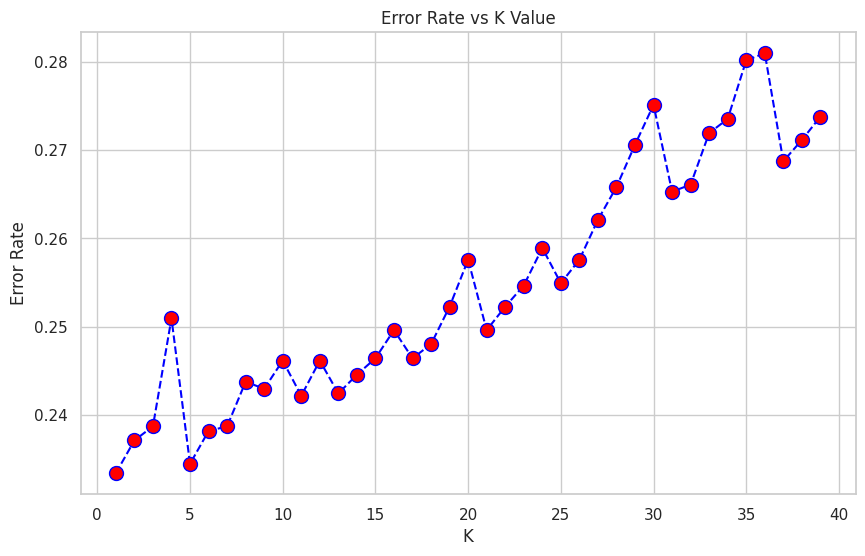

In [53]:
# plot the error rate and number of k

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Input the optimal value to knn model

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_balanced, y_balanced)

KNeighborsClassifier()

In [57]:
y_train_pred = knn.predict(X_balanced)
y_test_pred = knn.predict(X_test_balanced)

In [58]:
classification_eval(y_balanced, y_train_pred, 'KNN Training')

7162 7378 108 324
Evaluation Model: KNN Training
[[7378  108]
 [ 324 7162]]
Accuracy: 97.11 %
Precision: 98.51 %
Recall: 95.67 %
f1 Score: 97.07 %


In [59]:
# Eval the testing
classification_eval(y_test_balanced, y_test_pred, 'KNN Training')

1046 1831 48 833
Evaluation Model: KNN Training
[[1831   48]
 [ 833 1046]]
Accuracy: 76.56 %
Precision: 95.61 %
Recall: 55.67 %
f1 Score: 70.37 %


## Decision Tree

In [70]:
X_trainint = X_train.astype(int)

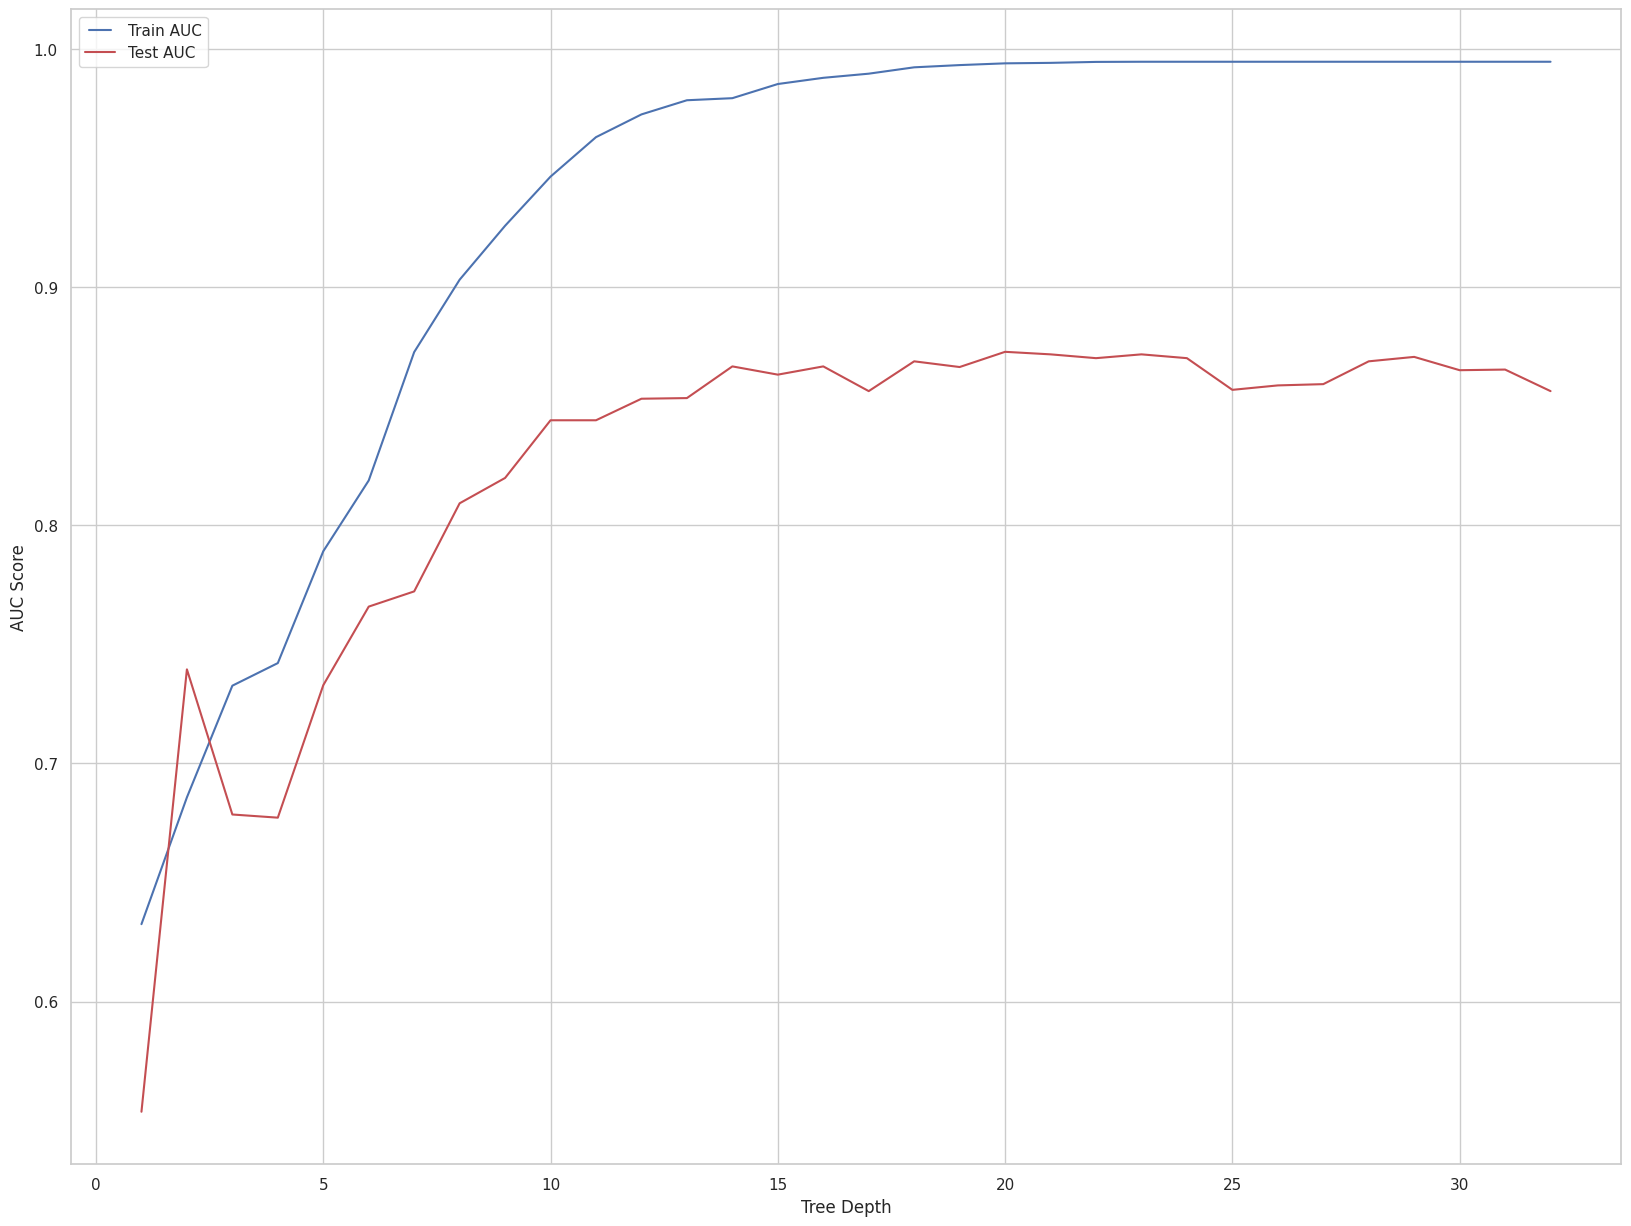

In [93]:
# find max depth

from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
  dt = DecisionTreeClassifier(max_depth=int(max_depth))
  dt.fit(X_balanced, y_balanced)
  train_pred = dt.predict(X_balanced)
  false_positive_rate, true_positive_rate, threesholds = roc_curve(y_balanced, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  # add auc score to previous train results
  train_results.append(roc_auc)
  y_pred = dt.predict(X_test_balanced)
  false_positive_rate, true_positive_rate, threesholds = roc_curve(y_test_balanced, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  #add auc score to previous test results
  test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label = 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D (numpoints=2)})
plt.ylabel('AUC Score')
plt.xlabel('Tree Depth')
plt.show()

In [94]:
dectree = DecisionTreeClassifier(max_depth=20)
dectree.fit(X_balanced, y_balanced)

DecisionTreeClassifier(max_depth=20)

In [95]:
y_train_pred = dectree.predict(X_balanced)
y_test_pred = dectree.predict(X_test_balanced)

In [96]:
# Eval the model
classification_eval(y_balanced, y_train_pred, 'Decision Tree Training')

7446 7435 51 40
Evaluation Model: Decision Tree Training
[[7435   51]
 [  40 7446]]
Accuracy: 99.39 %
Precision: 99.32 %
Recall: 99.47 %
f1 Score: 99.39 %


In [97]:
classification_eval(y_test_balanced, y_test_pred, 'Decision Tree Test')

1377 1853 26 502
Evaluation Model: Decision Tree Test
[[1853   26]
 [ 502 1377]]
Accuracy: 85.95 %
Precision: 98.15 %
Recall: 73.28 %
f1 Score: 83.91 %


## Random Forest

In [98]:
# We can use the same maximum depth used in the Decision Tree
ranfor = RandomForestClassifier(max_depth=20)
ranfor.fit(X_balanced, y_balanced)

RandomForestClassifier(max_depth=20)

In [99]:
y_train_pred = ranfor.predict(X_balanced)
y_test_pred = ranfor.predict(X_test_balanced)

In [100]:
classification_eval(y_balanced, y_train_pred, 'Random Forest Training')

7447 7441 45 39
Evaluation Model: Random Forest Training
[[7441   45]
 [  39 7447]]
Accuracy: 99.44 %
Precision: 99.4 %
Recall: 99.48 %
f1 Score: 99.44 %


In [101]:
classification_eval(y_test_balanced, y_test_pred, 'Random Forest Testing')

1358 1862 17 521
Evaluation Model: Random Forest Testing
[[1862   17]
 [ 521 1358]]
Accuracy: 85.68 %
Precision: 98.76 %
Recall: 72.27 %
f1 Score: 83.46 %


## Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [103]:
clf.fit(X_balanced, y_balanced)

LogisticRegression(random_state=0)

In [104]:
y_train_pred = clf.predict(X_balanced)
y_test_pred = clf.predict(X_test_balanced)

In [105]:
classification_eval(y_balanced, y_train_pred, 'Logistic Regression Training')

4381 4686 2800 3105
Evaluation Model: Logistic Regression Training
[[4686 2800]
 [3105 4381]]
Accuracy: 60.56 %
Precision: 61.01 %
Recall: 58.52 %
f1 Score: 59.74 %


In [106]:
classification_eval(y_test_balanced, y_test_pred, 'Logistic Regression Testing')

809 1143 736 1070
Evaluation Model: Logistic Regression Testing
[[1143  736]
 [1070  809]]
Accuracy: 51.94 %
Precision: 52.36 %
Recall: 43.05 %
f1 Score: 47.25 %


## XGBoost

In [108]:
import xgboost as xgb
xgbclf = xgb.XGBClassifier(random_state=0)

In [109]:
xgbclf.fit(X_balanced, y_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [110]:
y_train_pred = xgbclf.predict(X_balanced)
y_test_pred = xgbclf.predict(X_test_balanced)

In [111]:
classification_eval(y_balanced, y_train_pred, 'XGB Training')

7438 7445 41 48
Evaluation Model: XGB Training
[[7445   41]
 [  48 7438]]
Accuracy: 99.41 %
Precision: 99.45 %
Recall: 99.36 %
f1 Score: 99.4 %


In [113]:
classification_eval(y_test_balanced, y_test_pred, 'XGB Testing')

1711 1861 18 168
Evaluation Model: XGB Testing
[[1861   18]
 [ 168 1711]]
Accuracy: 95.05 %
Precision: 98.96 %
Recall: 91.06 %
f1 Score: 94.85 %


## Choose the best model

We found that XGBClassifer is the best model with 95% accuracy from testing evaluation.

In [115]:
xgb = xgb.XGBClassifier()
model = xgb.fit(X_balanced, y_balanced)
prediction = xgb.predict(X_test_balanced)

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1879
           1       0.99      0.91      0.95      1879

    accuracy                           0.95      3758
   macro avg       0.95      0.95      0.95      3758
weighted avg       0.95      0.95      0.95      3758

